In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [23]:
import datetime
import satdata
import satpy
from pathlib import Path
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

<IPython.core.display.Javascript object>

# Downloading files

In [24]:
t = datetime.datetime(day=2, month=2, year=2020, hour=14, minute=0)
dt_max = datetime.timedelta(minutes=20)

cli = satdata.Goes16AWS()

filenames = []
for channel in [1, 2, 3]:
    keys = cli.query(time=t, region="F", debug=True, dt_max=dt_max, channel=channel)
    fn = cli.download(keys[0])[0]
    filenames.append(fn)

Quering prefix `ABI-L1b-RadF/2020/033/13`


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3075.00it/s]


Quering prefix `ABI-L1b-RadF/2020/033/13`


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1319.79it/s]


Quering prefix `ABI-L1b-RadF/2020/033/13`


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2020.38it/s]


<IPython.core.display.Javascript object>

# Creating truecolor composites

In [25]:
scene = satpy.Scene(filenames, reader="abi_l1b")

<IPython.core.display.Javascript object>

In [30]:
# instruct satpy to load the channels necessary for the `true_color`
# composite
scene.load(["true_color"])

/Volumes/agile/tooling/miniconda3/envs/eurec4a-goes-truecolor-rgb-intake/lib/python3.8/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)


<IPython.core.display.Javascript object>

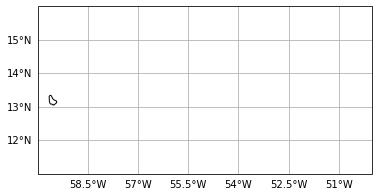

<IPython.core.display.Javascript object>

In [52]:
BBOX = [-60, -50, 11, 16]  # WESN

fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.set_extent(BBOX, crs=ccrs.PlateCarree())
ax.gridlines(draw_labels=["left", "bottom"])
ax.coastlines()

In [53]:
# satpy bbox: (xmin, ymin, xmax, ymax), WSEN
ll_bbox = [BBOX[0], BBOX[2], BBOX[1], BBOX[3]]
print(ll_bbox)
# ll_bbox = (-105.0, 40.0, -95.0, 50.0)
scene_cropped = scene.crop(ll_bbox=ll_bbox)

[-60, 11, -50, 16]


/Volumes/agile/tooling/miniconda3/envs/eurec4a-goes-truecolor-rgb-intake/lib/python3.8/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)


<IPython.core.display.Javascript object>

In [54]:
# it is necessary to "resample" here because the different channels are at
# different spatial resolution. By not passing in an "area" the highest
# resolution possible will be used
new_scn = scene_cropped.resample(resampler="native")

# get out a dask-backed DataArray for the composite
da_truecolor = new_scn["true_color"]

/Volumes/agile/tooling/miniconda3/envs/eurec4a-goes-truecolor-rgb-intake/lib/python3.8/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)
/Volumes/agile/tooling/miniconda3/envs/eurec4a-goes-truecolor-rgb-intake/lib/python3.8/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)
/Volumes/agile/tooling/miniconda3/envs/eurec4a-goes-truecolor-rgb-intake/lib/python3.8/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ st

<IPython.core.display.Javascript object>

In [55]:
da_truecolor

<xarray.DataArray 'concatenate-2466df692fcdd6307387ffefa743a0c6' (bands: 3,
                                                                  y: 1066,
                                                                  x: 2028)>
dask.array<concatenate, shape=(3, 1066, 2028), dtype=float64, chunksize=(1, 780, 1014), chunktype=numpy.ndarray>
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown",E...
  * y        (y) float64 1.721e+06 1.721e+06 1.72e+06 ... 1.188e+06 1.188e+06
  * x        (x) float64 1.569e+06 1.57e+06 1.57e+06 ... 2.584e+06 2.585e+06
  * bands    (bands) <U1 'R' 'G' 'B'
Attributes:
    orbital_parameters:      {'projection_longitude': -75.0, 'projection_lati...
    standard_name:           true_color
    instrument_ID:           FM1
    platform_shortname:      G16
    scan_mode:               M6
    scene_abbr:              F
    platform_name:           GOES-16
    long_name:               Bidirectional Reflectance
    cell_methods:            t: point area: point
    timeline_ID:             None
    observation_type:        Rad
    scene_id:                Full Disk
    reader:                  abi_l1b
    production_site:         WCDAS
    grid_mapping:            goes_imager_projection
    orbital_slot:            GOES-East
    sensor:                  abi
    start_time:              2020-02-02 13:40:13.300000
    ancillary_variables:     []
    area:                    Area ID: GOES-East\nDescription: 0.5km at nadir\...
    end_time:                2020-02-02 13:49:44.100000
    wavelength:              None
    resolution:              500
    _satpy_id:               DataID(name='true_color', resolution=500)
    name:                    true_color
    prerequisites:           [DataQuery(name='C02', modifiers=('sunz_correcte...
    optional_prerequisites:  []
    mode:                    RGB

<IPython.core.display.Javascript object>

In [56]:
da_truecolor

<xarray.DataArray 'concatenate-2466df692fcdd6307387ffefa743a0c6' (bands: 3,
                                                                  y: 1066,
                                                                  x: 2028)>
dask.array<concatenate, shape=(3, 1066, 2028), dtype=float64, chunksize=(1, 780, 1014), chunktype=numpy.ndarray>
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown",E...
  * y        (y) float64 1.721e+06 1.721e+06 1.72e+06 ... 1.188e+06 1.188e+06
  * x        (x) float64 1.569e+06 1.57e+06 1.57e+06 ... 2.584e+06 2.585e+06
  * bands    (bands) <U1 'R' 'G' 'B'
Attributes:
    orbital_parameters:      {'projection_longitude': -75.0, 'projection_lati...
    standard_name:           true_color
    instrument_ID:           FM1
    platform_shortname:      G16
    scan_mode:               M6
    scene_abbr:              F
    platform_name:           GOES-16
    long_name:               Bidirectional Reflectance
    cell_methods:            t: point area: point
    timeline_ID:             None
    observation_type:        Rad
    scene_id:                Full Disk
    reader:                  abi_l1b
    production_site:         WCDAS
    grid_mapping:            goes_imager_projection
    orbital_slot:            GOES-East
    sensor:                  abi
    start_time:              2020-02-02 13:40:13.300000
    ancillary_variables:     []
    area:                    Area ID: GOES-East\nDescription: 0.5km at nadir\...
    end_time:                2020-02-02 13:49:44.100000
    wavelength:              None
    resolution:              500
    _satpy_id:               DataID(name='true_color', resolution=500)
    name:                    true_color
    prerequisites:           [DataQuery(name='C02', modifiers=('sunz_correcte...
    optional_prerequisites:  []
    mode:                    RGB

<IPython.core.display.Javascript object>

In [57]:
from satpy.writers import get_enhanced_image

<IPython.core.display.Javascript object>

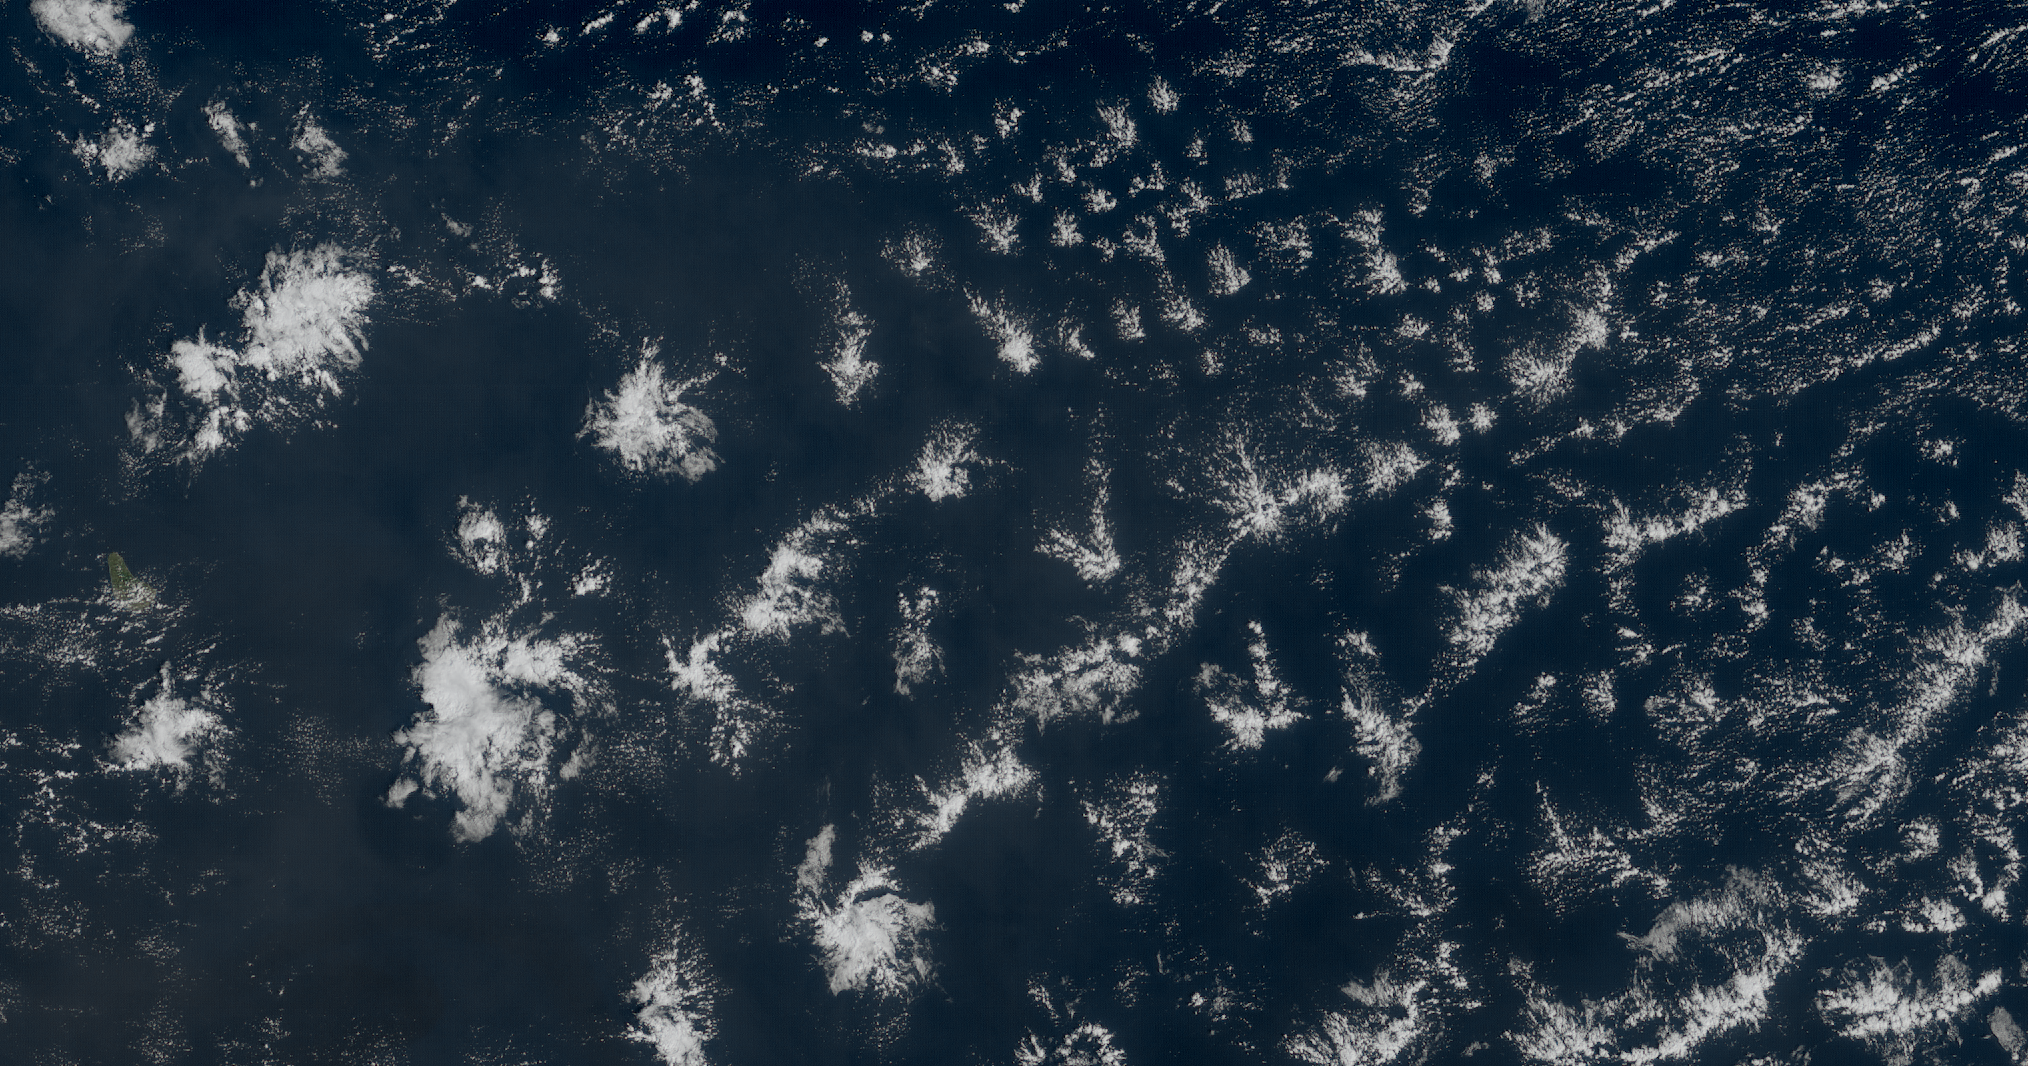

<IPython.core.display.Javascript object>

In [58]:
get_enhanced_image(da_truecolor)

In [59]:
img = _

<IPython.core.display.Javascript object>

In [61]:
type(img)

trollimage.xrimage.XRImage

<IPython.core.display.Javascript object>

In [63]:
new_scn.save_dataset("true_color", writer="geotiff")

ERROR 1: PROJ: proj_create_from_name: Cannot find proj.db


<IPython.core.display.Javascript object>